# Natural Language Processing (NLP)
## Text Categorization

+ **Natural Language Processing (NLP)** is a discipline within AI that combines computing with human communication.
+ Applications are Speech Recognition, Speech Tagging, Machine Translation, Sentiment Analysis, Chatbots, Text Summarization and a multitude of other functions.


### References:
+ https://realpython.com/python-nltk-sentiment-analysis/
+ https://www.nltk.org/howto/classify.html
+ https://www.nltk.org/book/ch06.html
+ https://www.tensorflow.org/text/tutorials/classify_text_with_bert
+ [NLTK Summary](https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3)
+ [How to summarize text with OpenAI and LangChain](https://medium.com/@johnidouglasmarangon/how-to-summarize-text-with-openai-and-langchain-e038fc922af)
+ [Text Summary with OpenAI GPT-3 API](https://medium.com/muthoni-wanyoike/implementing-text-summarization-using-openais-gpt-3-api-dcd6be4f6933)
    + [Improved Implementation with OpenAI](https://medium.com/@tanguyvans/how-to-summarize-long-texts-using-openai-improving-coherence-and-structure-d896c5510c45)
+ [Text Summary with Multiple Tools](https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961)
+ [Text Summary with Llama2](https://medium.com/@tushitdavergtu/llama2-and-text-summarization-e3eafb51fe28)

In [13]:
BUCKET_NAME ="cio-training-vertex-colab"
PROJECT_NAME="ai-training-2024-08-09"

In [1]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Google Colab Check
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    print("You are running this notebook in Google Colab.")
else:
    print("You are running this notebook with Jupyter iPython runtime.")
    print("Assumption is you have the required libraries to execute this notebook.")

You are running this notebook in Google Colab.


## Library Management

In [2]:

import sys
import subprocess
import importlib.util

In [3]:
!pip install nltk

In [4]:
libraries=["nltk", "bs4", "wordcloud", "pathlib", "numpy", "Pillow"]
import importlib.util

for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"])
    else:
      print("Library " + library + " already installed.")

Library nltk already installed.
Library bs4 already installed.
Library wordcloud already installed.
Library pathlib already installed.
Library numpy already installed.
Library Pillow already installed.


In [5]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- Import Natural Language Processing (NLP) specific libs
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  # A word stemmer based on the Porter stemming algorithm.  Porter, M. "An algorithm for suffix stripping." Program 14.3 (1980): 130-137.
from nltk import pos_tag
from nltk.tree import tree
from nltk import FreqDist
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords

#from nltk.book import * #<- Large Download, only pull if you want raw material to work with

In [6]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# More NLP specific libraries
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import nltk
from nltk.stem import *

from bs4 import BeautifulSoup                 #used to parse the text
from wordcloud import WordCloud, STOPWORDS    #custom library specifically designed to make word clouds
stemmer = PorterStemmer()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# a set of libraries that perhaps should always be in Python source
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import os
import socket
import sys
import getopt
import inspect
import warnings
import json
import pickle
from pathlib import Path
import itertools
import datetime
import re
import shutil
import string
import io

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Additional libraries for this work
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import math
from base64 import b64decode
from IPython.display import Image
import requests

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Data Science Libraries
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import numpy as np

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Graphics
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# progress bar
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from tqdm import tqdm

In [7]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#- NLTK required resources
#- Required to load necessary files to support NLTK
#- Downloads repository of knowledge to augment (this is the data portion) the library
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nltk.download("stopwords")
nltk.download("words")
nltk.download('punkt')
#nltk.download("all")  #<- Only do this if you want the full spectrum of all possible packages, it's a LOT!

# Noun Part of Speech Tags used by NLTK
# More can be found here
# http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/
NOUNS = ['NN', 'NNS', 'NNP', 'NNPS']
VERBS = ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Functions

In [8]:
## Outputs library version history of effort.
#
def lib_diagnostics() -> None:

    import pkg_resources

    package_name_length=40
    package_version_length=20

    # Get installed packages
    the_packages=["nltk", "numpy", "os", "pandas"]
    installed = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    for package_idx, package_name in enumerate(installed):
         if package_name in the_packages:
             installed_version = installed[package_name]
             print(f"{package_name:<40}#: {str(pkg_resources.parse_version(installed_version)):<20}")

    try:
        print(f"{'TensorFlow version':<40}#: {str(tf.__version__):<20}")
        print(f"{'     gpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('GPU')))}")
        print(f"{'     cpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('CPU')))}")
    except Exception as e:
        pass

    try:
        print(f"{'Torch version':<40}#: {str(torch.__version__):<20}")
        print(f"{'     GPUs available?':<40}#: {torch.cuda.is_available()}")
        print(f"{'     count':<40}#: {torch.cuda.device_count()}")
        print(f"{'     current':<40}#: {torch.cuda.current_device()}")
    except Exception as e:
        pass


    try:
      print(f"{'OpenAI Azure Version':<40}#: {str(the_openai_version):<20}")
    except Exception as e:
      pass
    return

## Function Call

In [9]:
lib_diagnostics()

nltk                                    #: 3.8.1               
numpy                                   #: 1.26.4              
pandas                                  #: 2.1.4               


# Input Sources

In [10]:
###########################################
#- API Parameters for things like WordCloud
#- Variables help hold information for later use
#- The "constants" represent variables that we don't anticipate changing over the course of the program.
###########################################
IMG_BACKGROUND=None                             #None without quotes or "black", "white", etc...
IMG_FONT_SIZE_MIN=10
IMG_WIDTH=1024
IMG_HEIGHT=768


In [16]:
#!rm -rf ./folderOnColab && echo "Ok, removed." || { echo "No folder to remove."; exit 1; }
#!mkdir -p ./folderOnColab && echo "Folder created." || { echo "Failed to create folder, it might already exist.";  }
#!gsutil -m cp -r gs://usfs-gcp-rand-test-data-usc1/public_source/jbooks/ANewHope.txt ./folderOnColab

target_folder="./folderOnColab"
target_files=["ANewHope.txt", "slf*.txt", "alb*.txt"]
print(f"Creating a folder ({target_folder}) to store project data.")
subprocess.run(["mkdir", "-p" , target_folder])
if os.path.isdir(target_folder):
  for idx, filename in enumerate(target_files):
    print(f"Copying {filename} to target folder: {target_folder}")
    subprocess.run(["gsutil", "-m" , "cp", "-r", f"gs://{BUCKET_NAME}/training-data/jbooks/{filename}",  target_folder], check=True)
else:
    print("ERROR: Local folder not found/created.  Check the output to ensure your folder is created.")
    print(f"...target folder: {target_folder}")
    print("...if you can't find the problem contact the instructor.")


Creating a folder (./folderOnColab) to store project data.
Copying ANewHope.txt to target folder: ./folderOnColab
Copying slf*.txt to target folder: ./folderOnColab
Copying alb*.txt to target folder: ./folderOnColab


In [17]:
data=""

#select the filename you want to process your body of text from: ANewHope.txt, slf_final_wordcloud_content.txt, alb_final_wordcloud_content.txt
target_filename=target_folder+os.sep+"slf_final_wordcloud_content.txt"          #<- Change here


#check for the file's existence
if os.path.isfile(target_filename):
  #open the file, read the contents and close the file
  f = open(target_filename, "r", encoding="cp1252")
  data=f.read()
  f.close()
else:
    print("ERROR: File not found.  Check the previous code block to ensure you file copied.")
    print(f"...target file: {target_filename}")
    print("...if you can't find the problem contact the instructor.")

if len(data)<1:
    print("ERROR: There is no content in your data variable.")
    print("...Verify you copied the input file correctly.")
    print("...if you can't find the problem contact the instructor.")
else:
    print(f"It appears your data file was read, your data file has {len(data):,} elements of data.")

It appears your data file was read, your data file has 24,139 elements of data.



# *Natural Language Processing Methods *

+ **Tokenization** is a fundamental task that involves breaking down a piece of text into smaller units called tokens. These tokens can be individual characters, entire words, or even subwold pieces, depending on the tokenization method used.
+ **Stop words** are inconsequential words that appear frequently in a language but don’t contribute much to the overall understanding of a sentence or document. They often include articles, prepositions, conjunctions, and common verbs.
+ **Stemming** is a text preprocessing technique that involves reducing words to their base or root form, known as stems.
+ **Lemmatization** aims to identify and convert words to their base forms by considering their grammatical properties and meanings.


***Why might a Data Scientist use NLP techniques on a body of text when performing AI work?***

In [18]:
###########################################
#- Demonstrate use of tokens and stopwords
###########################################

#Perform a tokenization at the sentence level of the data.
response=sent_tokenize(data)
print(f"There are {len(response)} sentences.")

#extra code to debug and see how the output looks.
#for the_index, the_sentence in enumerate(response):
#    print(f"{the_index}. {the_sentence.strip()}")
#
#print("\n")

#Perform a tokenization at the word level of the data.
response=word_tokenize(data)
print(f"There are {len(response)} words.")

#apply stop words to remove inconsequential words that appear frequently but don't influence the overall understanding of the setences.
#gather the stop words for the NLTK library into a variable
stop_words = set(stopwords.words("english"))
#create a list data structure that will hold the resulting words
filtered_list = []
#break the overall data into "word" tokens after making everything lowercase (why would we do that?  Ask the instructor?)
response=word_tokenize(data.lower())

#Python "lamba" expression, very efficient for loop, used to continue normalizing the data by only allowing alpha characters that are equal to or greater than 2.
wordlist = [x for x in response if (len(x)>=2 and x.isalpha())]

#loop through each word in the wordlist and verify that it is not a stop word.  if the word is not a stop word, save it for later use.
for word in tqdm(wordlist):
    if word.casefold() not in stop_words:
         filtered_list.append(word)

print(f"\nThere are {len(filtered_list)} remaining words after cleaning them up.")


There are 157 sentences.
There are 4466 words.


100%|██████████| 3681/3681 [00:00<00:00, 1504651.89it/s]


There are 2214 remaining words after cleaning them up.


# Cloud Map

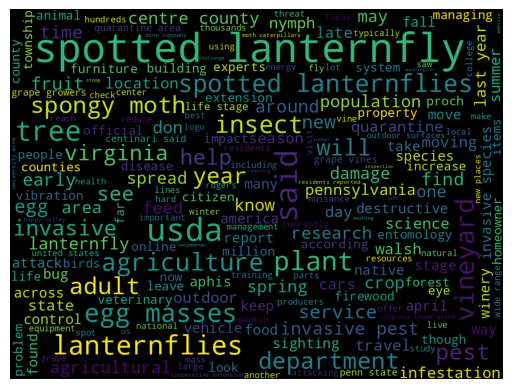

In [19]:
########################################
#API Call (resultant is an image)
########################################
try:
    #invoke the word cloud API using the original list of lowercase, alpha, > 2 character words.
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=IMG_BACKGROUND,
                          min_font_size=IMG_FONT_SIZE_MIN,
                          width=IMG_WIDTH,
                          height=IMG_HEIGHT,
                         ).generate(" ".join(wordlist))

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud call as follows: {str(e)}")

########################################
#Show the Results
########################################
#turn the image into a displayed graphic
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Cloud Map with Stop Words Applied to Original Body of Text

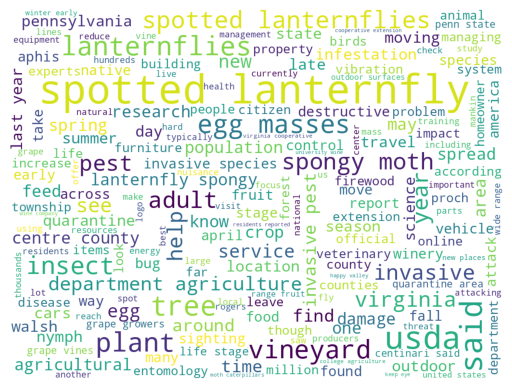

In [20]:
########################################
#Data Marshaling
########################################
data = " ".join(filtered_list)

########################################
#Basic Clean-Up
########################################
try:
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',                #options line "None" yield transparent background.
                          min_font_size=IMG_FONT_SIZE_MIN,
                          width=IMG_WIDTH,
                          height=IMG_HEIGHT,
                         ).generate(data)

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud() call as follows: {str(e)}")
########################################
#Show the Results
########################################
#turn the image into a displayed graphic
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
target_folder="./folderOnColab"
masks=["usfs_mask.jpg", "slf_mask.jpg", "force_mask.jpg"]
if os.path.isdir(target_folder):
  for idx, filename in enumerate(masks):
    print(f"Copying {filename} to target folder: {target_folder}")
    subprocess.run(["gsutil", "-m" , "cp", "-r", f"gs://{BUCKET_NAME}/training-data/llm/masks/{filename}",  target_folder], check=True)
else:
    print("ERROR: Local folder not found/created.  Check the output to ensure your folder is created.")
    print(f"...target folder: {target_folder}")
    print("...if you can't find the problem contact the instructor.")


Copying usfs_mask.jpg to target folder: ./folderOnColab
Copying slf_mask.jpg to target folder: ./folderOnColab
Copying force_mask.jpg to target folder: ./folderOnColab


Processing...usfs_mask.jpg
Processing...slf_mask.jpg
Processing...force_mask.jpg


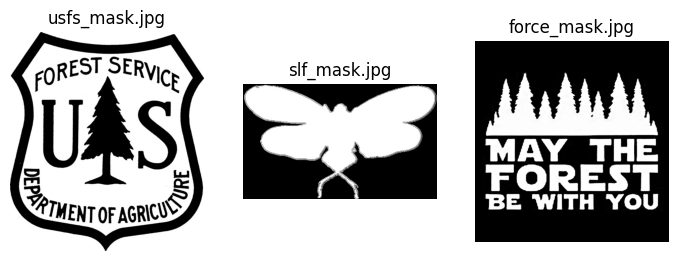

In [23]:
###########################################
#- Images, Mask loading and setup
###########################################
#setup the plot mechanism to show the images.
# Adds a subplot at the 1st position
rows=1
cols=3
position=1
img_ary=[]
fig = plt.figure(figsize=(8.5,11))
#fig = plt.figure()


#loop through the lists and print them side by side
for idx, filename in enumerate(masks):
    print(f"Processing...{filename}")
    fig.add_subplot(rows,cols, position)
    img_ary.append(Image.open(target_folder+os.sep+filename))
    # showing image
    plt.imshow(img_ary[idx])
    plt.axis('off')
    plt.title(os.path.basename(filename))
    # Adds a subplot at the next position
    position += 1


# With a Mask

Note that the "mask" is effectively an image of same size that's black and white.  Blacked out portions become the area you can populate so I took the USFS logo, inverted so the white becomes black and filled in the verbiage there.

Next I paste the transparent PNG on top of the original logo thus putting the words in the middle.

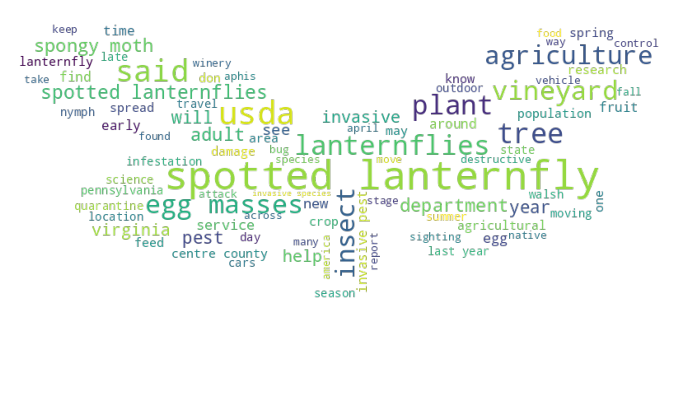

In [24]:
########################################
#Mask loading and setup
########################################

#choose a different mask if you want different results, options are: usfs_mask.jpg, slf_mask.jpg, force_mask.jpg
target_filename="slf_mask.jpg"                        #<- change here
the_logo=Image.open(target_folder+os.sep+target_filename)

try:
    #invert the colors of the mask image, so that the image is "reversed"
    inverted_image = PIL.ImageOps.invert(the_logo)
    # Convert the image to a numeric representation (a 3D array)
    the_mask = np.array(inverted_image)
except Exception as e:
    print(f"ERROR detected trying read the mask image and invert the colors call as follows: {str(e)}")


########################################
#Data Marshaling, NLP setup
########################################
data = " ".join(filtered_list)

########################################
#API Call
########################################
try:
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      mode="RGBA",
                      background_color=IMG_BACKGROUND, #white, black, blue, etc
                      min_font_size=IMG_FONT_SIZE_MIN,
                      width=IMG_WIDTH,
                      height=IMG_HEIGHT,
                      mask=the_mask,
                     ).generate(" ".join(wordlist))
    the_image= wordcloud.to_image()

except Exception as e:
    print(f"ERROR detected trying invoke the WordCloud() call as follows: {str(e)}")

#turn the image into a displayed graphic
plt.figure(figsize=(8.5,11))
plt.axis('off')
plt.imshow(the_image)
plt.show()

# Merge the Images into a single instance

You might want to try another image and text block on your own.

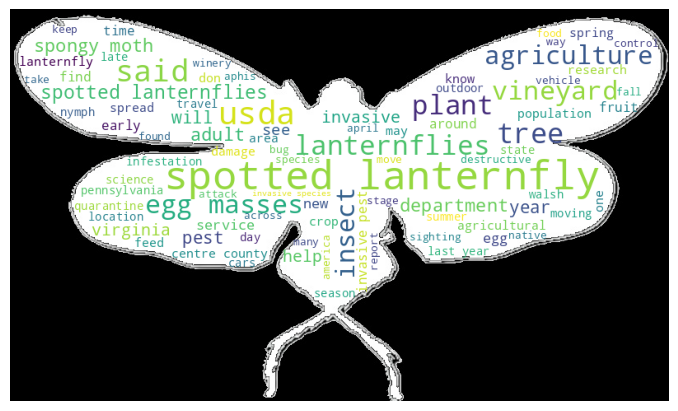

In [25]:
# creating a image object (main image)
im1=the_logo
im2=the_image
alpha = im2.getchannel('A')

#transparency save
im1.paste(im2, (0,0), im2)

the_final_image=im1
plt.figure(figsize=(8.5,11))
plt.axis('off')
plt.imshow(the_final_image)
plt.show()